In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from plotly import graph_objects as go, express as px

from pyclustertend import hopkins

In [2]:
#!pip install yellowbrick==1.3

In [3]:
#!pip install pyclustertend

In [4]:
df = pd.read_csv('Country-data.csv')

In [5]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
df2 = df.copy()

In [8]:
df2 = df2.drop("country", axis = 1)

In [9]:
df2.isnull().sum()

,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


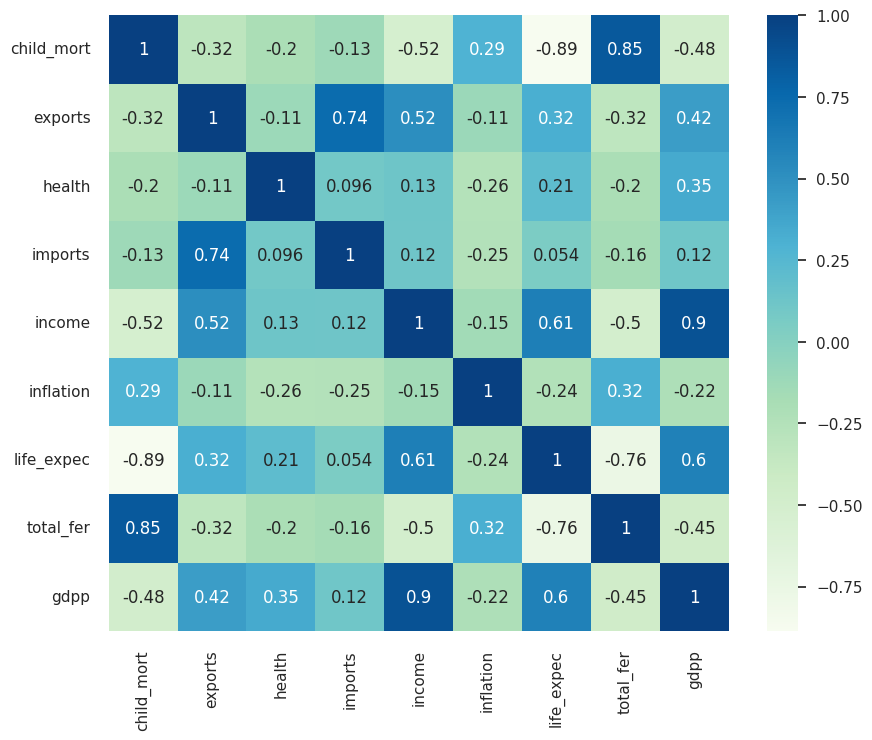

In [10]:
sns.set_theme(style = "whitegrid")
plt.figure(figsize = (10,8))
sns.heatmap(df2.corr(), annot = True, cmap = "GnBu")
plt.show()

In [11]:
df2.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [12]:
hopkins(df2, df2.shape[0])

/usr/local/lib/python3.12/dist-packages/pyclustertend/hopkins.py:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min_data_frame[0], max_data_frame[0], sampling_size
/usr/local/lib/python3.12/dist-packages/pyclustertend/hopkins.py:63: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min_data_frame[1], max_data_frame[1], sampling_size
/usr/local/lib/python3.12/dist-packages/pyclustertend/hopkins.py:71: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

np.float64(0.09550862606385863)

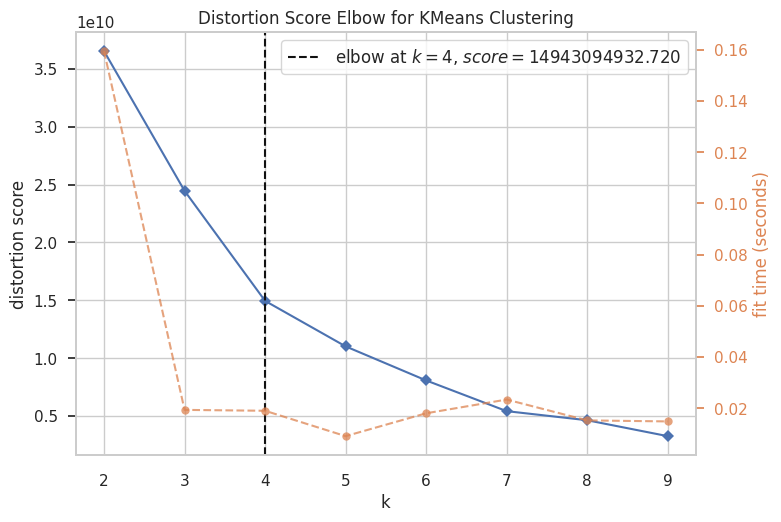

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
k_mean = KMeans()
elbow = KElbowVisualizer(k_mean, k = (2,10))
elbow.fit(df2)
elbow.show()

In [14]:
km = KMeans(n_clusters = 4)
km.fit(df2)

KMeans(n_clusters=4)

In [15]:
centroid = km.cluster_centers_
centroid

array([[5.83562500e+01, 3.19104063e+01, 6.23031250e+00, 4.57621448e+01,
        5.26628125e+03, 9.41454167e+00, 6.56885417e+01, 3.70322917e+00,
        2.43368750e+03],
       [6.22857143e+00, 9.64428571e+01, 5.71285714e+00, 6.85714286e+01,
        8.03428571e+04, 6.38871429e+00, 8.02857143e+01, 1.76714286e+00,
        6.54428571e+04],
       [5.47916667e+00, 4.55750000e+01, 9.21625000e+00, 4.06666667e+01,
        4.06541667e+04, 3.24458333e+00, 8.00291667e+01, 1.94250000e+00,
        3.99125000e+04],
       [1.53450000e+01, 5.08225000e+01, 6.97325000e+00, 4.95375000e+01,
        2.04875000e+04, 6.82947500e+00, 7.48500000e+01, 1.94525000e+00,
        1.28845000e+04]])

In [16]:
labels = km.labels_
labels

array([0, 0, 0, 0, 3, 3, 0, 2, 2, 3, 3, 2, 0, 3, 3, 2, 0, 0, 0, 0, 0, 0,
       3, 1, 3, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 2, 3,
       2, 0, 0, 0, 0, 3, 0, 3, 0, 2, 2, 3, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0,
       0, 3, 2, 0, 0, 3, 0, 2, 2, 2, 0, 2, 0, 3, 0, 0, 1, 0, 0, 3, 3, 0,
       0, 3, 3, 1, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 1, 2, 0, 3, 0, 0, 0, 3, 3, 1, 3, 3, 0, 0, 2, 0, 0, 3,
       0, 1, 3, 3, 0, 0, 3, 2, 0, 0, 0, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 2, 2, 2, 3, 0, 0, 3, 0, 0, 0], dtype=int32)

In [17]:
df2["cluster"] = labels
df2

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3
...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,3
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [18]:
df2.groupby("cluster").mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster,,,,,,,,,
0,58.356250,31.910406,6.230313,45.762145,5266.281250,9.414542,65.688542,3.703229,2433.687500
1,6.228571,96.442857,5.712857,68.571429,80342.857143,6.388714,80.285714,1.767143,65442.857143
2,5.479167,45.575000,9.216250,40.666667,40654.166667,3.244583,80.029167,1.942500,39912.500000
3,15.345000,50.822500,6.973250,49.537500,20487.500000,6.829475,74.850000,1.945250,12884.500000


In [19]:
df["cluster"] = labels

In [20]:
df.to_csv("country_data_clusterized.csv", index = False)

In [25]:
df2 = df2.drop(["cluster"], axis = 1)

In [26]:
pca = PCA(n_components= 3)
df2_pca = pca.fit_transform(df2)

centroid = km.cluster_centers_
centroids_pca = pca.transform(centroid)

labels = km.labels_

df_plot = pd.DataFrame(df2_pca, columns = ["x", "y", "z"])
df_plot["cluster"] = labels

df_centroids = pd.DataFrame(centroids_pca, columns = ["x", "y", "z"])
df_centroids["cluster"] = ["centroid"] * len(df_centroids)

fig = px.scatter_3d(
    df_plot, x = "x", y = "y", z = "z", color = df_plot["cluster"].astype(str), opacity = 0.7
    )

fig.add_scatter3d(
    x = df_centroids["x"],
    y = df_centroids["y"],
    z = df_centroids["z"],
    mode = "markers",
    marker = dict(size = 10, color = "red", symbol = "x"),
    text = [f"C. {i}" for i in range(len(df_centroids))],
    textposition = "top center",
    name = "centroides"
)

fig.show()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
